<a href="https://colab.research.google.com/github/JatinB22/DataScienceProjects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 2. Load dataset (you need the CSV file in your working directory)
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# Quick view

In [ ]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)':'SpendingScore'}, inplace=True)

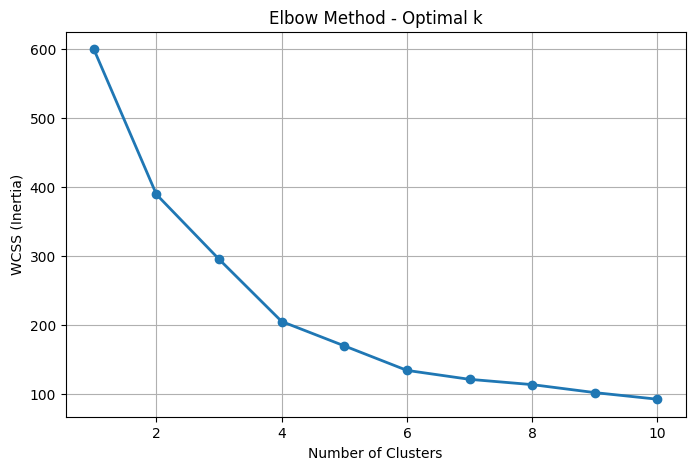

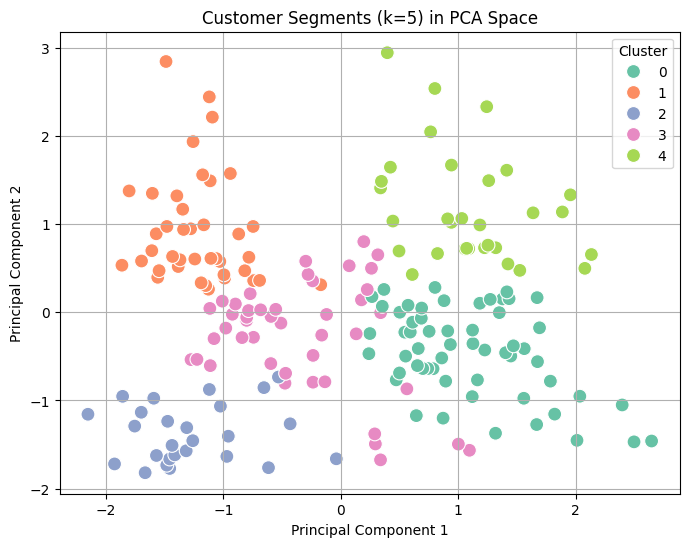


Cluster Profiles:
          Age_mean  Age_min  Age_max  AnnualIncome_mean  AnnualIncome_min  \
Cluster                                                                    
0            55.3       40       70               47.6                19   
1            32.9       27       40               86.1                69   
2            25.8       18       35               26.1                15   
3            26.7       18       40               54.3                16   
4            44.4       32       59               89.8                71   

         AnnualIncome_max  SpendingScore_mean  SpendingScore_min  \
Cluster                                                            
0                      67                41.7                  3   
1                     137                81.5                 58   
2                      42                74.8                 39   
3                      81                40.9                  5   
4                     137              

In [ ]:
# 3. Feature selection
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# 4. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Elbow method to determine optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linewidth=2)
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# 6. Fit final K-Means model (let's assume k=5 based on elbow)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# 7. PCA for 2D visualisation
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (k=5) in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 8. Cluster profiling
profile = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'AnnualIncome': ['mean', 'min', 'max'],
    'SpendingScore': ['mean', 'min', 'max'],
    'CustomerID': 'count'
}).round(1)

profile.columns = ['_'.join(col) for col in profile.columns]
profile.rename(columns={'CustomerID_count': 'Count'}, inplace=True)
print("\nCluster Profiles:\n", profile)

# 9. Insights summary
for i, row in profile.iterrows():
    print(f"\nCluster {i}: {int(row['Count'])} customers — "
          f"Avg Age: {row['Age_mean']}, Income: ${row['AnnualIncome_mean']}k, "
          f"Spending Score: {row['SpendingScore_mean']}")

